In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#将图标嵌入到Notebook中
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")#忽略警告

读取数据

In [2]:
features=pd.read_csv('../../data/Chp5/Ex2/UCI HAR Dataset/features.txt',sep='\s+',index_col=0,header=None)#读取特征名

In [3]:
train_data= pd.read_csv('../../data/Chp5/Ex2/UCI HAR Dataset/train/X_train.txt',sep='\s+',names=list(features.values.ravel()))#读取训练集
test_data= pd.read_csv('../../data/Chp5/Ex2/UCI HAR Dataset/test/X_test.txt',sep='\s+',names=list(features.values.ravel()))#读取测试集集

In [4]:
train_data.info()#训练集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [5]:
test_data.info()#测试集信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB


In [6]:
train_label=pd.read_csv('../../data/Chp5/Ex2/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None)#训练集标签
test_label=pd.read_csv('../../data/Chp5/Ex2/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None)#测试集标签

In [7]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
0    7352 non-null int64
dtypes: int64(1)
memory usage: 57.5 KB


In [8]:
test_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
0    2947 non-null int64
dtypes: int64(1)
memory usage: 23.1 KB


In [9]:
label_name=pd.read_csv('../../data/Chp5/Ex2/UCI HAR Dataset/activity_labels.txt',sep='\s+',header=None,index_col=0)

In [10]:
label_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 1 to 6
Data columns (total 1 columns):
1    6 non-null object
dtypes: object(1)
memory usage: 96.0+ bytes


In [11]:
#分析数据
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [12]:
#分析数据
test_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.231018,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.008433,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,0.142676,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,0.288320,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


In [13]:
#分析数据
train_label.describe()

,0
count,7352.000000
mean,3.643362
std,1.744802
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [14]:
#分析数据
test_label.describe()

,0
count,2947.000000
mean,3.577876
std,1.740348
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [15]:
#分析数据
label_name.describe()

,1
count,6
unique,6
top,WALKING
freq,1


In [16]:
train_data.isnull().sum()
#没有缺失值

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

In [17]:
test_data.isnull().sum()
#没有缺失值

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

In [18]:
train_data['label']=train_label
test_data['label']=test_label

In [19]:
def get_label_name(num):
    return label_name.iloc[num-1,0]#在原来的标签号基础上减一
train_data['label_name']=train_data['label'].map(get_label_name)
test_data['label_name']=test_data['label'].map(get_label_name)

In [20]:
#原来标签为1-6，而算法需要0-5
train_data['label']=train_data['label']-1
test_data['label']=test_data['label']-1

观察每个分类的数量

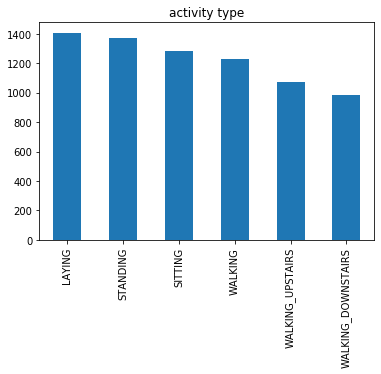

In [21]:
train_data['label_name'].value_counts().plot(kind='bar', title='activity type')

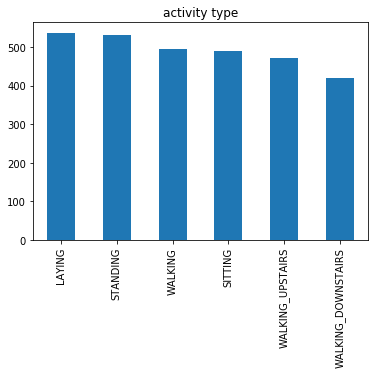

In [22]:
test_data['label_name'].value_counts().plot(kind='bar', title='activity type')

In [23]:
#可知训练集和测试集类别数据分布差不多

In [24]:
#制作训练集和测试集，使格式符合sklean算法要求
x_train=train_data.iloc[:,:-2].values
x_test=train_data.iloc[:,-2].values
y_train=test_data.iloc[:,:-2].values
y_test=test_data.iloc[:,-2].values

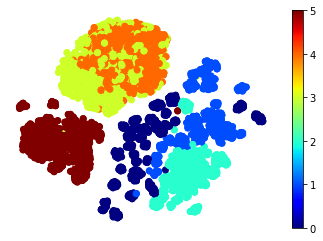

In [25]:
#对数据进行降维可视化
#使用t-sne进行可视化分析
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)#调入t-sne(将数据降成二维)
out=tsne.fit_transform(x_train)#使用t-sne，处理数据
plt.scatter(out[:, 0], out[:, 1], c=x_test,cmap='jet')#画图
plt.axis('off')
plt.colorbar()
plt.show()

In [26]:
#由图可知，第三类和第三四类不好区分，重叠区域较多

In [27]:
#PCA方法
from sklearn.decomposition import PCA
pca = PCA(.99)#建立pca模型
X2D = pca.fit_transform(x_train)#使用pca，处理数据，训练并降维
radtio=pca.explained_variance_ratio_#画图，每个主成成分占方差比例
print(pca.n_components)#n_components指示主成成分有有的元素数量

0.99


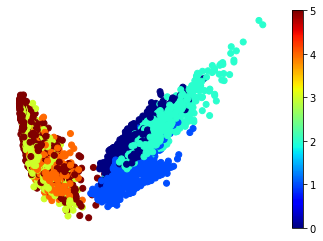

In [28]:
plt.scatter(X2D[:, 0], X2D[:, 1], c=x_test,cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

In [29]:
#pca降维，失去了结构信息，而t-sne使属于流形学习，能将高维流形映射到低维空间，保留了结构，因此更加直观，但是大致可以看出3和4,5不好区分

In [30]:
#对某一个特征观察分布，输入特征列名字即可
#seaborn是matplotlib的补充，以matplotlib为底层
import seaborn as sns
def plot_feature(feature_name):#想分析哪个特征，就将特征名输入函数即可
    plt.figure(figsize=(10,5))
    plt.title("Sensor data distribution for all label")
    class_indexs=list(label_name.values.ravel())#得到所有类别
    for class_index in class_indexs:#根据类别，画出
        sns.distplot(train_data[train_data['label_name']==class_index][feature_name], label=class_index)
    plt.legend()#给图像加上图例
    plt.show()# plots the distribution of all the columns of both left and wright wrist

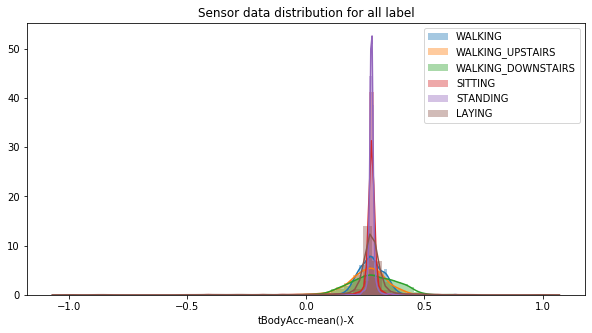

In [31]:
plot_feature('tBodyAcc-mean()-X')

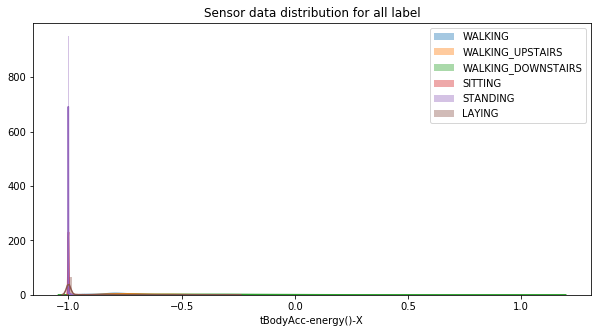

In [32]:
plot_feature('tBodyAcc-energy()-X')

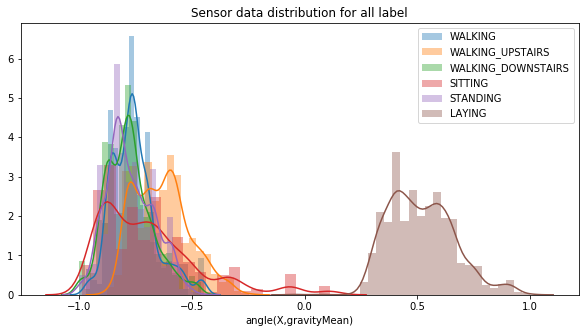

In [33]:
plot_feature('angle(X,gravityMean)')

训练模型

逻辑回归

In [34]:
from sklearn.metrics import confusion_matrix   #从sklearn.metrics中调用混淆矩阵计算真实值与预测值之间的误差
from sklearn.metrics import make_scorer,classification_report   #
from sklearn.externals import joblib
#实现一个评估模型性能的函数，基于混淆矩阵可视化

def plt_model(true_label,predict):
    confusion_mat=confusion_matrix(true_label,predict)#生成混淆矩阵
    plt.imshow(confusion_mat,cmap=plt.cm.Paired) #可视化混淆矩阵（cmap配色风格）
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks=list(range(confusion_mat.shape[0]))
    plt.xticks(tick_marks,tick_marks)
    plt.yticks(tick_marks,tick_marks)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    for first_index in range(confusion_mat.shape[0]):#在图上标注分类样本数目
        for second_index in range(confusion_mat.shape[0]):
            plt.text(first_index, second_index, confusion_mat[second_index][first_index])
    plt.show()
    
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
def score_model(pre,test_neg_label):#输出几种评分
    precision_scores=precision_score(pre,test_neg_label)
    recall_scores=recall_score(pre,test_neg_label)
    f1_scores=f1_score(pre,test_neg_label)
    roc_scores=roc_auc_score(pre,test_neg_label)
    print('precision_score:'+str(precision_scores))
    print('recall_score:'+str(recall_scores))
    print('f1_score:'+str(f1_scores))
    print('roc_scores:'+str(roc_scores))

/home/tianyi/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
#逻辑回归调参
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf=LogisticRegression()#建立逻辑回归模型

#我们调节penalty和c两个参数
penalty=['l1','l2']   #正则化参数，l1绝对值度量，l2平方度量
c_range=np.arange(1,10,1)
param_grid = {'C':c_range,'penalty':penalty}
#建立格子搜索器，遍历参数集合，选择最好的参数
gs=GridSearchCV(clf,param_grid=param_grid,cv=10,verbose=4,n_jobs=-32)#cv是n折交叉验证,n_jobs是线程并行化
gs.fit(x_train,x_test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-32)]: Using backend LokyBackend with 33 concurrent workers.
[Parallel(n_jobs=-32)]: Done  32 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-32)]: Done 161 out of 180 | elapsed:  1.0min remaining:    7.2s
[Parallel(n_jobs=-32)]: Done 180 out of 180 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-32,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [36]:
best_score=gs.best_score_#取得最佳分数
bese_pa=gs.best_params_#取得最佳参数
best_gs=gs.best_estimator_#取得最佳分类器
print(best_score)
print("最佳参数：")
print(bese_pa)
joblib.dump(best_gs,'best_gs_logist.m')

0.9538900979325353
最佳参数：
{'C': 4, 'penalty': 'l1'}


['best_gs_logist.m']

In [37]:
best_gs=joblib.load('best_gs_logist.m')

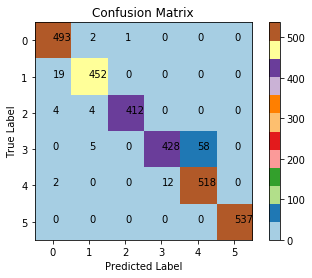

In [38]:
pre_label=best_gs.predict(y_train)#预测
plt_model(y_test,pre_label)#画混淆矩阵

In [39]:
print('准确率：'+str(best_gs.score(y_train,y_test)))#输出准确率

准确率：0.9636918900576857


In [40]:
print(classification_report(y_test,pre_label))#输出各个类别准确率报告

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       496
           1       0.98      0.96      0.97       471
           2       1.00      0.98      0.99       420
           3       0.97      0.87      0.92       491
           4       0.90      0.97      0.94       532
           5       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.97      0.96      0.96      2947



In [41]:
#从上图可知，第3类和第4类不易分开，错误最集中，和可视化分析结果一致

In [42]:
#分析逻辑回归中影响最大的几个特征，逻辑回归中的特征重要性评估不是特别精确，不如随机森林的特征重要性
coef=best_gs.coef_

In [43]:
coef

array([[ 0.        ,  0.        ,  0.        , ..., -0.02922522,
         0.        ,  0.        ],
       [-0.97425371,  0.        ,  0.        , ...,  0.10203978,
         0.6159682 ,  0.53568396],
       [ 2.38215709,  0.        ,  0.        , ..., -0.51018793,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -3.22031442,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -2.71380415,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  5.29032528,
         0.        ,  0.        ]])

In [44]:
coef.shape#由于采取one vs all处理多类别，我们观察每一个分类器影响前三的特征，首先对系数绝对值

(6, 561)

In [45]:
coef_abs=np.abs(coef)
indexs=np.argsort(-coef_abs, axis=1)#降序排列
cols=list(train_data.columns)
for i in range(6):
    print('第'+str(i+1)+'分类器前三特征：')
    for j in range(3):
        print(cols[indexs[i,j]]+'   :'+str(coef[i,j]))

第1分类器前三特征：
tBodyAcc-correlation()-X,Y   :0.0
tBodyGyroJerk-correlation()-X,Z   :0.0
tBodyAccJerk-entropy()-Z   :0.0
第2分类器前三特征：
tGravityAcc-max()-Y   :-0.9742537135100802
tBodyGyroJerk-arCoeff()-Z,1   :0.0
tBodyAccJerk-min()-X   :0.0
第3分类器前三特征：
tBodyAcc-correlation()-X,Y   :2.3821570881822747
tBodyAcc-entropy()-Z   :0.0
tBodyAcc-arCoeff()-X,4   :0.0
第4分类器前三特征：
tBodyGyroJerk-entropy()-X   :0.0
tGravityAcc-mean()-Y   :0.0
tBodyGyroJerk-arCoeff()-X,2   :0.0
第5分类器前三特征：
tBodyGyroJerk-entropy()-X   :0.0
tGravityAcc-mean()-Y   :0.0
tBodyGyroJerk-arCoeff()-X,2   :0.0
第6分类器前三特征：
tGravityAcc-min()-X   :0.0
angle(X,gravityMean)   :0.0
tGravityAcc-sma()   :0.0


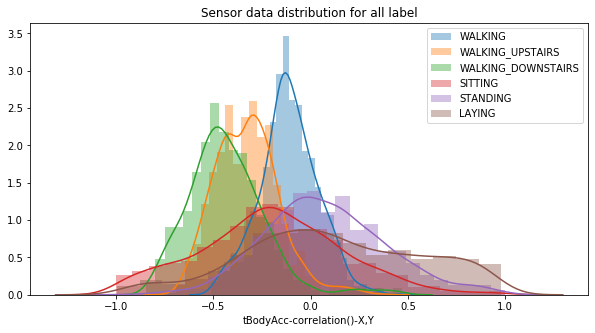

In [46]:
plot_feature('tBodyAcc-correlation()-X,Y')

In [47]:
#可以看出warking和其他特征的分布有明显差异，峰很高，容易区分第一类和非第一类

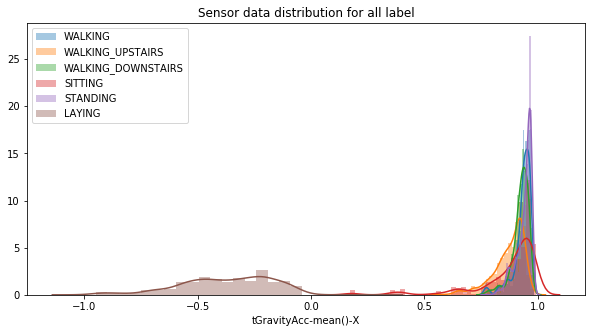

In [48]:
plot_feature('tGravityAcc-mean()-X')

In [49]:
#第6类在这个特征上和其他类完全不一样

梯度提升树

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
estimator=np.arange(100,400,50)
learning_rate=np.arange(0.01,0.2,0.02)
param_grid={'n_estimators':estimator,'learning_rate':learning_rate}
tree = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=tree)
gs=GridSearchCV(estimator=ada,param_grid=param_grid,cv=10,verbose=4,n_jobs=-32)
gs.fit(x_train,x_test)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-32)]: Using backend LokyBackend with 33 concurrent workers.
[Parallel(n_jobs=-32)]: Done  32 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-32)]: Done 155 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-32)]: Done 326 tasks      | elapsed:   46.1s


In [ ]:
best_score=gs.best_score_
bese_pa=gs.best_params_
best_gs=gs.best_estimator_
print(best_score)
print("最佳参数：")
print(bese_pa)
joblib.dump(best_gs,'best_gs_adaboost.m')

In [ ]:
#在测试集上验证
pre_label=best_gs.predict(y_train)
plt_model(y_test,pre_label)

In [ ]:
print(best_gs.score(y_train,y_test))

随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#对max_features和n_estimators进行选择
clf = RandomForestClassifier(max_features=None,random_state=0)
estimator=np.arange(20,160,40)
my_max_features = [ "sqrt", "log2"]
param_grid={'n_estimators':estimator,"max_features":my_max_features}
gs=GridSearchCV(estimator=clf,param_grid=param_grid,cv=10,verbose=4,n_jobs=-32)
gs.fit(x_train,x_test)

In [ ]:
best_score=gs.best_score_
bese_pa=gs.best_params_
best_gs=gs.best_estimator_
print(best_score)
print("最佳参数：")
print(bese_pa)
joblib.dump(best_gs,'best_gs_randomforst.m')

In [ ]:
#在测试集上验证
pre_label=best_gs.predict(y_train)
plt_model(y_test,pre_label)

In [ ]:
print(best_gs.score(y_train,y_test))

In [ ]:
print(classification_report(y_test,pre_label))#输出各个类别准确率报告

In [ ]:
#特征重要性
importances = best_gs.feature_importances_#得到特征重要性
indices = np.argsort(importances)[::-1]#对特征重要性排序
cols=list(train_data.columns)
for f in range(10):#输出特征重要性
    print("%2d) %-*s %f" % (f + 1, 30,cols[2+indices[f]],importances[indices[f]]))

In [ ]:
#在随机森林来看，这个特征最重要
plot_feature('tGravityAcc-min()-X')

线性SVM

In [ ]:
from sklearn.svm import LinearSVC
svm_linear=LinearSVC()
c_range = np.logspace(-3, 6, 10, base=10)
param_grid = {'C':c_range}
gs=GridSearchCV(svm_linear,param_grid=param_grid,cv=10,verbose=4,n_jobs=-32)
gs.fit(x_train,x_test)

In [ ]:
best_score=gs.best_score_
bese_pa=gs.best_params_
best_gs=gs.best_estimator_
print(best_score)
print("最佳参数：")
print(bese_pa)
joblib.dump(best_gs,'best_gs_svm.m')

In [ ]:
#在测试集上验证
pre_label=best_gs.predict(y_train)
plt_model(y_test,pre_label)

In [ ]:
print(best_gs.score(y_train,y_test))

In [ ]:
print(classification_report(y_test,pre_label))#输出各个类别准确率报告

In [ ]:
#综合分析上述4个模型，使用线性模型分数更高，比如逻辑回归，线性SVM，而树型算法对第3类无法很好区分，容易将它分为第2类